# Kleinian reflections

This notebook illustrates repeated reflections in a system of circular mirrors (called here *cycles* in line with the general framework).

First, we execute the cell, which downloads and installs all required software. Its execution can take a minute or two, but it is required only once per session. 

In [1]:
%%bash

# Execute this cell on Ubuntu only
if grep -e "ID=ubuntu" /etc/os-release ; then \
    echo 'Continue on Ubuntu' ; \
else \
    echo 'Does not look like an Ubuntu box, exiting' ; \
    exit ; \
fi

# Check if the software is already installed
if dpkg -l python3-pymoebinv > /dev/null ; then \
    echo 'The package is already installed, exiting' ; \
    exit ; \
fi

# Install signature key of the Ubuntu repository
curl -L https://sourceforge.net/projects/moebinv/files/binary/ubuntu/moebinv.gpg.key | apt-key add - 

# Add Ubuntu repository to known sources
echo 'deb https://sourceforge.net/projects/moebinv/files/binary/ubuntu bionic main' > \
     /etc/apt/sources.list.d/moebinv-bionic.list 

# Update the contents of the repository
apt update 

# Install required packages and their dependencies
apt-get  -q -y install asymptote python3-pymoebinv

# Copy useful initialisation file to the current directory
zcat /usr/share/doc/python3-pymoebinv/EPAL-v1/init_cycle.py.gz > init_cycle.py

Does not look like an Ubuntu box, exiting


First, we define a procedure which will make iterative reflections of a figure in the initial cycles.

In [2]:
def make_reflections(F, n : int):
    """The routine produces sequential reflection of the figure F
    in its all generation-0 cycles in a turn.
    n -- the number of reflections to perform.
    Since there is no predefined ordering for GiNaC object,
    every run of this routine can produce a different output."""

    # We are copying the figure to do not spoil the original with reflections.
    F0= figure(F)

    # All cycles at generation 0 a treated as mirrors
    mirrors = F0.get_all_keys(0, 0)
    Nm = len(mirrors)
    for i in range(n):
        # print(f"Make reflection in {mirrors[i % Nm]}")
        F0.reflection(mirrors[i % Nm], True, "", False)

    return figure(F0)

The simplicity of the above routine is possible due to advanced algorithms implemented in the library `figure`, which we are loading here.

In [3]:
from figure import *
# If you do not want to use additioanl IPython magic then comment the next line
%load_ext figure
from IPython.display import Image
show_asy_off()

Now we define a simple figure with only two cycles. We are adding a bit of colours to make illustration more vivid.

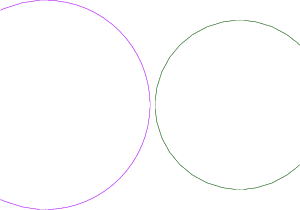

In [4]:
# We define a new figure with the following point and cycle metrics:
mir = figure()
mir.set_asy_style(mir.get_real_line(), "invisible")

# ## Cycles in generation 0
# The following cycles are defined by their coefficients
A = mir.add_cycle(cycle_data(1, matrix([[1.0, 0]]), -1), "A")
mir.set_asy_style(A, "rgb(0,0.333333,0)+solid+1pt")
B = mir.add_cycle(cycle_data(1, matrix([[-2.25, 0]]), 2), "B")
mir.set_asy_style(B, "rgb(0.666667,0,1)+solid+1pt")
%asy_write(mir, 300, -3, 2, -3, 3, "mirrors", "png", True, True, 0, "", True, False)

For visualisation we have used the IPython magic here defined by the `figure` package. Otherwise a pair of commands
```
#mir.asy_write(300, -3, 2, -3, 3, "mirrors", "png", True, True, 0, "", True, False)
#Image("mirrors.png")
```
will produce the same effect.

Let us see what are the repeated reflections in these two cycles. 

**Technical:** we have to supply the long list of parameters to the method `asy_write()` because we want that the very last one, which controls the appearance of cycles' labels, to be `False` (too many cycles after reflections, their labels will make the picture messy). The previous five parameters (all after the file format descriptor `"png"`) receive their default values.

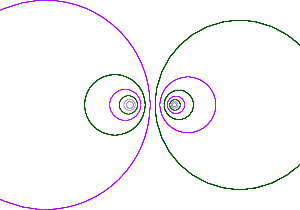

In [5]:
mir1 = make_reflections(mir, 6)
%asy_write(mir1, 300, -3, 2, -3, 3, "mirrors2", "png", True, True, 0, "", True, False)

We got nested cycles from the pencil spanned by the initial two cycles. This can be verified as follows:

In [6]:
reflections = mir1.get_all_keys(1, 6)
AreInPencil = True
for R in reflections:
    AreInPencil = AreInPencil and mir1.check_rel(R, [A,B], 'pencil')[0].op(0).is_zero_matrix()

f"The reflection belongs to the pencil of mirrors: {AreInPencil}"

'The reflection belongs to the pencil of mirrors: True'

Let us add the third cycle to the figure...

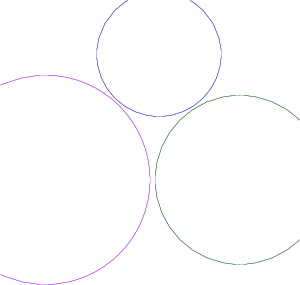

In [7]:
C = mir.add_cycle(cycle_data(1, matrix([[-0.35, 2.1]]), 3.45), "C")
mir.set_asy_style(C, "rgb(0,0,1)+solid+1pt")
%asy_write(mir, 300, -3, 2, -3, 3, "mirrors", "png", True, True, 0, "", True, False)

...and produce reflections for them:

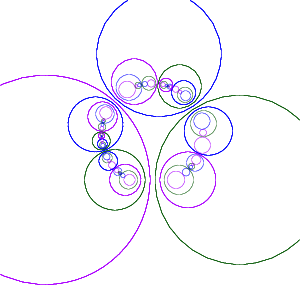

In [8]:
mir1 = make_reflections(mir, 6)
%asy_write(mir1, 300, -3, 2, -3, 3, "mirrors3", "png", True, True, 0, "", True, False)

This time all images are located around the cycle orthogonal to three initial cycles. Let us add this cycle explicitly to visualise the relation:

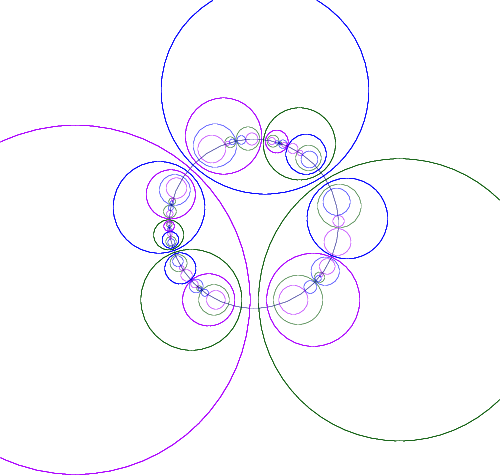

In [9]:
mir1.add_cycle_rel([is_orthogonal(A), is_orthogonal(B), is_orthogonal(C)], "E")
%asy_write(mir1, 500, -3, 2, -3, 3, "mirrors3a", "png", True, True, 0, "", True, False)

Finally, let us add the fourth cycle,

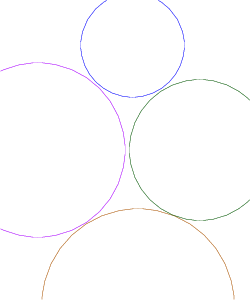

In [10]:
D = mir.add_cycle(cycle_data(1, matrix([[-0.24, -3.11]]), 6), "D")
mir.set_asy_style(D, "rgb(0.67,0.33,0)+solid+1pt")
%asy_write(mir, 300, -3, 2, -3, 3, "mirrors", "png", True, True, 0, "", True, False)

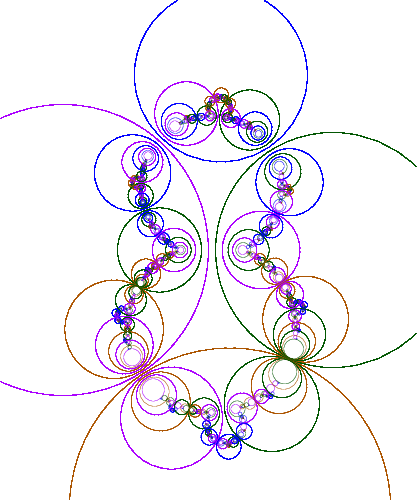

In [16]:
%asy_write(make_reflections(mir, 12), 500,-3,2,-3,3,"mirrors4","png",True, True, 0, "", True, False)

The next level of complexity appeared in the last image with all previous patterns still recognisable, of course.